In [6]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [28]:
def get_top_allocated_classes(a_dataframe):
    # Returns a list with the classes that were allocated the most.
    # To be a top allocator the class has to have at least 1% of the total allocations
    counts = a_dataframe['allocatedObjectClass'].value_counts()
    percs = a_dataframe['allocatedObjectClass'].value_counts(normalize=True)
    # Get classes that were allocated and that represent at least 1% of the total allocations (calculating by number of allocations)
    counts_and_percs = pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])
    top_allocated = counts_and_percs[ counts_and_percs['percentage'] >= 0.01 ]
    #convert to a list
    return top_allocated.axes[0].tolist()

def filter_by_top_allocated(a_df):
    top_allocated_classes = get_top_allocated_classes(a_df)
    
    dataframes = list()
    for i, object_class in enumerate(top_allocated_classes):
        dataframes.append(a_df[ a_df['allocatedObjectClass'] == object_class ])
    return top_allocated_classes, dataframes

def plot_densities_by_class(df, title, criterion, xlabel, logy=False):
    top_allocated_classes, dataframes = filter_by_top_allocated(df)

    fig, ax = plt.subplots(1,1)
    for a_df in dataframes:
        a_df[criterion].plot(kind='density', logy=logy)
    
    fig.suptitle(title)
    fig.supxlabel(xlabel)
    fig.legend(top_allocated_classes)
    return fig


def plot_accumulated_density(df, title, logy=False):
    return df['lifetime'].plot(kind='density', logy=logy, title=title, xlabel='Lifetime in seconds')

## Honey Ginger

In [21]:
hg_1 = pd.read_csv('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H17m36-hg1.csv')
hg_1['lifetime'] = (hg_1['finalizationTime'] - hg_1['initializationTime']) / 1000000 # to convert to seconds
f = open('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H17m36.json')
meta_data_hg_1 = json.load(f)
f.close()
meta_data_hg_1['totalExecutionTime'] = meta_data_hg_1['totalExecutionTime'] / 1000000 # to convert to seconds


hg_100 = pd.read_csv('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H17m31-hg100.csv')
hg_100['lifetime'] = (hg_100['finalizationTime'] - hg_100['initializationTime']) / 1000000
f = open('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H17m31.json')
meta_data_hg_100 = json.load(f)
f.close()
meta_data_hg_100['totalExecutionTime'] = meta_data_hg_100['totalExecutionTime'] / 1000000 # to convert to seconds

hg_50 = pd.read_csv('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-29H12m40-hg50.csv')
hg_50['lifetime'] = (hg_50['finalizationTime'] - hg_50['initializationTime']) / 1000000
f = open('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-29H12m40.json')
meta_data_hg_50 = json.load(f)
f.close()
meta_data_hg_50['totalExecutionTime'] = meta_data_hg_50['totalExecutionTime'] / 1000000 # to convert to seconds

In [26]:
# top_allocated_classes, filtered_dfs_50 = filter_by_top_allocated(hg_1)
total_instances = len(hg_50.index)
total_execution_time = meta_data_hg_50['totalExecutionTime']
total_full_gcs = meta_data_hg_50['totalFullGCs']

print(meta_data_hg_50['sampligRate'])
print(total_instances)
print(total_execution_time)
print(total_full_gcs)
print(meta_data_hg_50['totalScavenges'])
print()

# for a_df in filtered_dfs_50:
#     relative_instances = (len(a_df.index) / total_instances) * 100
#     relative_full_gcs = (a_df['survivedFullGC'].mean() / total_full_gcs) * 100
#     relative_lifetime = (a_df['lifetime'].mean() / total_execution_time) * 100

#     print(a_df.iloc[0]['allocatedObjectClass'])
#     print( 'Total instances of the class: ', str(relative_instances) , '%')
#     print('Average lifetime: ', str(relative_lifetime), '%')
#     print('Average survivedFullGC: ', str(relative_full_gcs) , '%')
#     print()

50
35152642
54.636007
34
323



# DataFrame 230 MB 2000000 rows and 5 columns

In [3]:
df_1 = pd.read_csv('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H12m32-df1.csv')
df_1['lifetime'] = (df_1['finalizationTime'] - df_1['initializationTime']) / 1000000 # to convert to seconds
f = open('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H12m32.json')
meta_data_df_1 = json.load(f)
f.close()
meta_data_df_1['totalExecutionTime'] = meta_data_df_1['totalExecutionTime'] / 1000000 # to convert to seconds

In [ ]:
df_100 = pd.read_csv('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H12m25-df100.csv')
df_100['lifetime'] = (df_100['finalizationTime'] - df_100['initializationTime']) / 1000000
f = open('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-25H12m25.json')
meta_data_df_100 = json.load(f)
f.close()
meta_data_df_100['totalExecutionTime'] = meta_data_df_100['totalExecutionTime'] / 1000000 # to convert to seconds

In [13]:
df_50 = pd.read_csv('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-29H12m45-df50.csv')
df_50['lifetime'] = (df_50['finalizationTime'] - df_50['initializationTime']) / 1000000
f = open('/Users/sebastian/Documents/PharoImages/new-2024/2024-01-29H12m45.json')
meta_data_df_50 = json.load(f)
f.close()
meta_data_df_50['totalExecutionTime'] = meta_data_df_50['totalExecutionTime'] / 1000000 # to convert to seconds

In [20]:
# top_allocated_classes, filtered_dfs_50 = filter_by_top_allocated(df_100)
total_instances = len(df_50.index)
total_execution_time = meta_data_df_1['totalExecutionTime']
total_full_gcs = meta_data_df_1['totalFullGCs']

print(meta_data_df_1['sampligRate'])
print(total_execution_time)
print(total_full_gcs)
print(total_instances)
print()

# for a_df in filtered_dfs_50:
#     relative_instances = (len(a_df.index) / total_instances) * 100
#     relative_full_gcs = (a_df['survivedFullGC'].mean() / total_full_gcs) * 100
#     relative_lifetime = (a_df['lifetime'].mean() / total_execution_time) * 100

#     print(a_df.iloc[0]['allocatedObjectClass'])
#     print( 'Total instances of the class: ', str(relative_instances) , '%')
#     print('Average lifetime: ', str(relative_lifetime), '%')
#     print('Average survivedFullGC: ', str(relative_full_gcs) , '%')
#     print()


1
80.235752
72
43016260



## Sampling 100%

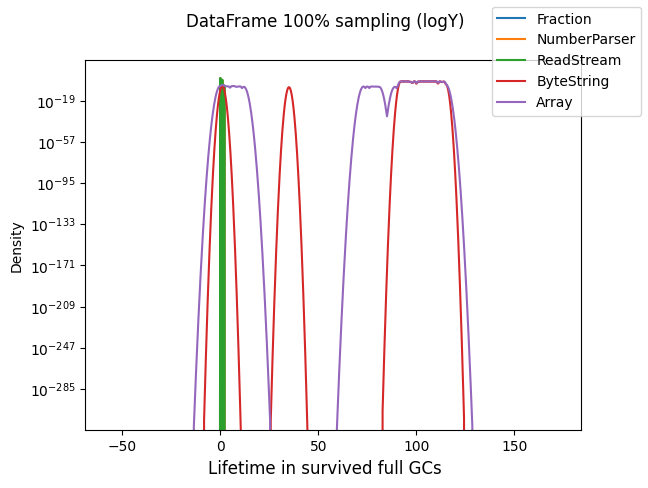

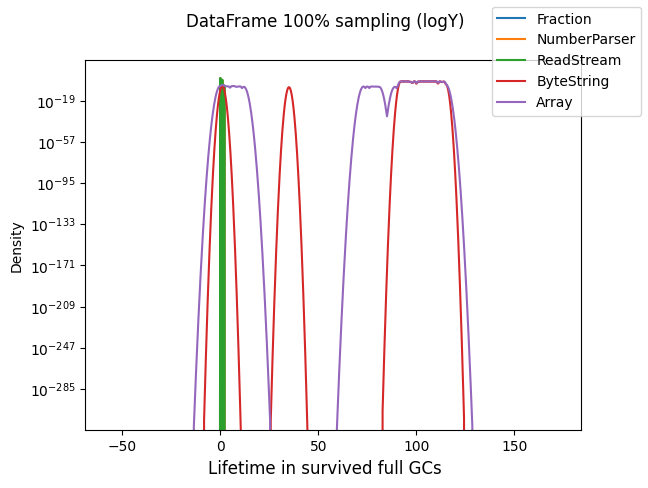

In [17]:
plot_densities_by_class(df_100, 'DataFrame 100% sampling (logY)', 'survivedFullGC', 'Lifetime in survived full GCs', logy=True)

In [9]:
scipy.stats.gaussian_kde(dataset=df_1['lifetime'])

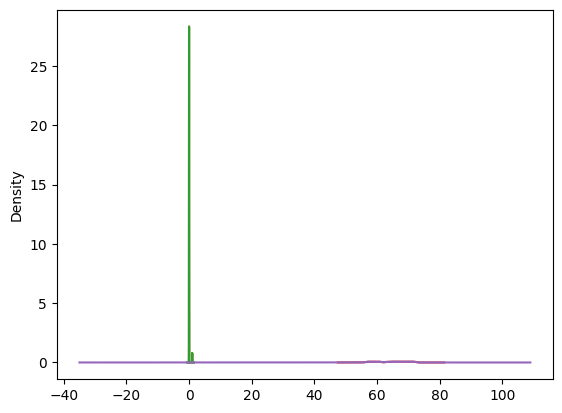

In [29]:
plot_densities_by_class2(df_1, 'DataFrame 1% sampling (logY)', 'survivedFullGC', 'Lifetime in survived full GCs', logy=False)

# plot_densities_by_class(df_1, 'DataFrame 1% sampling (logY)', 'lifetime', 'Lifetime in seconds', logy=True)

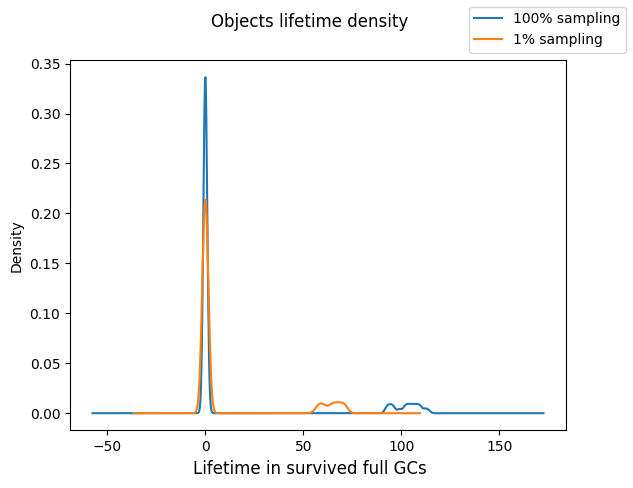

In [20]:
fig, ax = plt.subplots(1,1)

df_100['survivedFullGC'].plot(kind='density')
df_1['survivedFullGC'].plot(kind='density')
fig.supxlabel('Lifetime in survived full GCs')
fig.suptitle('Object''s lifetime density')
fig.legend(['100% sampling', '1% sampling'])